In [11]:
print("Recent contributors and numbers to the plastic pullution in our waterways.")

#Ingest, analyze and display multiple pieces of data.

import pandas as pd # pandas is being used for data cleansing and normalization
import numpy as np # is being used for mathematical operations
import matplotlib.pyplot as plt # is used for data visualization
import seaborn as sns # the data visualization library used in conjuction with matplotlib
import plotly.express as px # for plotting the data on world mapfrom 
from mpl_toolkits.basemap import Basemap
import math




Recent contributors and numbers to the plastic pullution in our waterways.


Import csv files originally downloaded from Our World in Data (ourworldindata/plastic-pollution.org)

In [12]:
#Import data from csv file downloaded from ourworldindata.org/plastic-pullution
global_share = pd.read_csv(r"assets\global_mismanaged_plastic_waste.csv")
rivers = pd.read_csv(r"assets\plastics_top_rivers.csv")
ocean_totals = pd.read_csv(r"assets\ocean_waste_ton.csv")
global_waste = pd.read_csv(r"assets\global_waste_2_ocean.csv")

Cleanse and merge csv files to produce the answer to "Which countries produce the most plastic waste?" and "Which countries emit most plastic waste to the oceans?" This data will be displayed in a stacked bar chart.

                              Mismanaged plastic waste  Waste to ocean
Entity                                                                
Asia                                         64.560107       80.993570
Africa                                       22.161703        7.989317
India                                        21.035004       12.916633
China                                        19.866383        7.218993
South America                                 8.001000        5.513253
Philippines                                   6.516203       36.384511
Brazil                                        5.336737        3.859175
Nigeria                                       3.154983        1.903093
North America                                 3.120234        4.499121
Tanzania                                      2.778529        0.590633
Turkey                                        2.680931        1.462952
Egypt                                         2.323821        0.252282
Democr

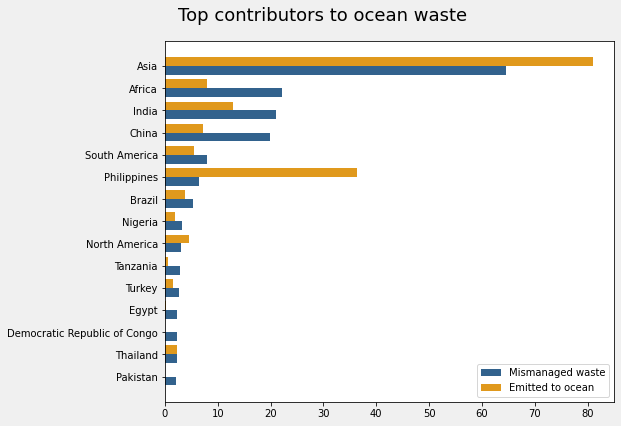

In [13]:
#Cleanse imported csv file
#Answer question: Which countries produce the most plastic waste? and Which countries emit most plastic waste to the oceans? in a stacked bar chart.

#drop unnecessary columns and rename remaining
global_share.drop(["Year","Code"], axis=1, inplace=True)
global_share.rename(columns = {"Share of global mismanaged plastic waste": "Mismanaged plastic waste"}, inplace=True)
global_share
global_waste.drop(["Year","Code"], axis=1, inplace=True)
global_waste.rename(columns = {"Global waste to ocean percentage": "Waste to ocean"}, inplace=True)
global_waste

#merge 2 csv files and sort data based on Entity
combined = pd.merge(global_share, global_waste, how="outer", on=["Entity"])
combined_values = pd.DataFrame(combined, columns=["Entity", "Mismanaged plastic waste", "Waste to ocean"])
combined_sorted = combined_values.sort_values(by="Mismanaged plastic waste", ascending=False)
combined_sorted.set_index("Entity", inplace=True)
ranking = combined_sorted.head(15)

print(combined_sorted.head(15))

# Design horizontal grouped bar chart
first_bar = ranking["Mismanaged plastic waste"]
first_bar_label = "Mismanaged waste"
first_bar_color = "#32628d"
second_bar = ranking["Waste to ocean"]
second_bar_label = "Emitted to ocean"
second_bar_color = "#e0991d"
labels = ranking.index
width = 0.4  # the width of the bars
plot_title = "Top contributors to ocean waste"
title_size = 18
filename = 'barh-plot'

fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)
plt.gca().invert_yaxis()
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])
plt.subplots_adjust(left=0.35, top=0.9)

ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()



CLeanse csv and display "Which rivers emit the most plastic to the ocean?" in a horizontal bar chart.

                                  Entity  River Percentage
34                   Pasig (Philippines)          6.432129
45                         Ulhas (India)          1.327265
44                Tullahan (Philippines)          1.327265
22                      Klang (Malaysia)          1.327265
28              Meycauayan (Philippines)          1.225167
31                Pampanga (Philippines)          0.949505
25                Libmanan (Philippines)          0.724891
12                        Ganges (India)          0.633003
37  Rio Grande de Mindanao (Philippines)          0.541116
1                   Agusan (Philippines)          0.469647


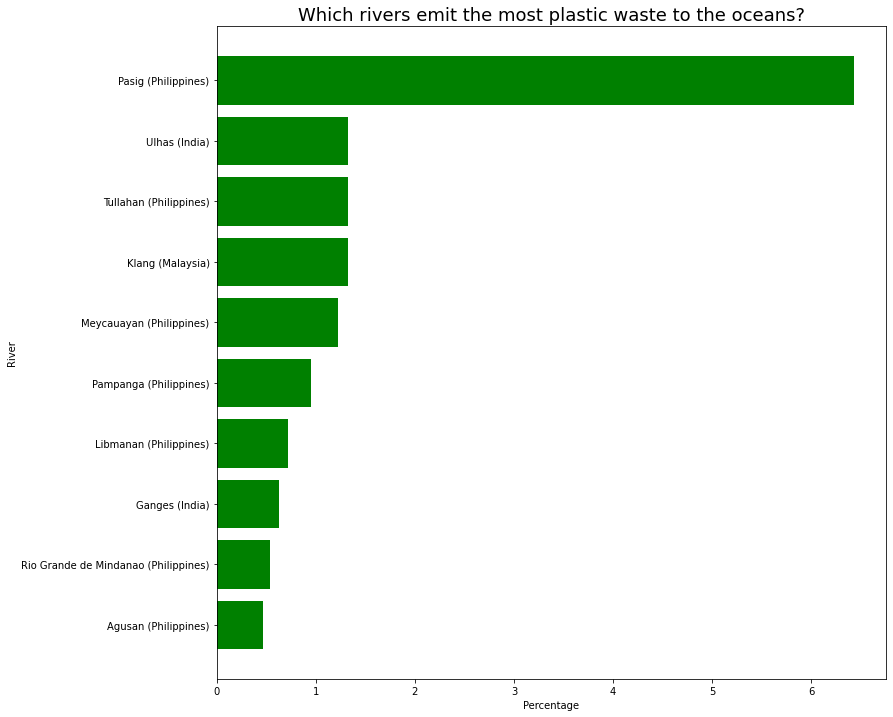

In [14]:
#Cleanse imported csv file
#Answer question: Which rivers emit most plastic to oceans?

#drop unnecessary columns and rename remaining
rivers.drop(["Year","Code"], axis=1, inplace=True)
rivers.rename(columns = {"Global plastics emitted to ocean in percentage": "River Percentage"}, inplace=True)
rivers

#sort data based on percentage
top_10_rivers = rivers.sort_values(by=["River Percentage"], ascending=False).head(10)
print(top_10_rivers)


#set x,y paramerters
X=top_10_rivers["River Percentage"]
Y=top_10_rivers["Entity"]

#design horizontal bar chart
plt.figure(figsize=(12,12))
plt.barh(Y,X, color='g')
plt.gca().invert_yaxis()
plt.title("Which rivers emit the most plastic waste to the oceans?", fontsize=18)
plt.ylabel("River")
plt.xlabel("Percentage")
plt.show()





Cleanse csv and answer "Which oceans have the most plastic waste?" in a Basemap diagram.

                 Entity  Total Mass (ton)
0  Global ocean (total)            268950
1          Indian Ocean             59130
2     Mediterranean Sea             23150
3        North Atlantic             56470
4         North Pacific             96400
5        South Atlantic             12780
6         South Pacific             21020
The total global amount of plastic in the oceans is 268,950 tons!


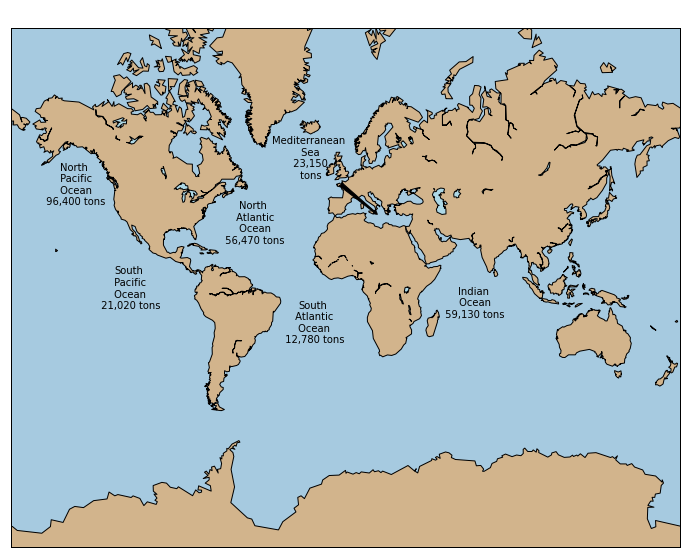

In [15]:
#Cleanse imported csv file
#Answer question: Which oceans have the most plastic waste?

#drop unnecessary columns and rename
ocean_totals.drop(['Code', 'Year'], axis=1, inplace=True)
ocean_totals
ocean_totals.rename(columns = {'All sizes (total mass) ton': 'Total Mass (ton)'}, inplace=True)
ocean_totals
print(ocean_totals)

#bold font
print("\033[91m" + "The total global amount of plastic in the oceans is 268,950 tons!" + "\033[0m")

#design world map
fig = plt.figure(num=None, figsize=(12, 10) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawmapboundary(fill_color='#A6CAE0')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')


#add annotations to map
plt.annotate('Indian\n Ocean\n 59,130 tons', m(68.75,-8.35), fontsize=10, ha='center', va='center')
plt.annotate('Mediterranean\n Sea\n 23,150\n tons', m(17.94,36.09), xytext=m(-19.56,56.87), fontsize=10, ha='center', va='center', arrowprops=dict(arrowstyle="fancy", color='black'))
plt.annotate('North\n Atlantic\n Ocean\n 56,470 tons', m(-49.57,32.57), fontsize=10, ha='center', va='center')
plt.annotate('South\n Atlantic\n Ocean\n 12,780 tons', m(-17.56,-18.53), fontsize=10, ha='center', va='center')
plt.annotate('North\n Pacific\n Ocean\n 96,400 tons', m(-145.88,48.32), fontsize=10, ha='center', va='center')
plt.annotate('South\n Pacific\n Ocean\n 21,020 tons', m(-116.53,-0.53), fontsize=10, ha='center', va='center')
plt.title('Which ocean has the most plastic waste?', fontsize=20, color='white')
plt.show()

Build dictionary and diagram the answer to "Where does plastic waste accumulate?" and its impact on wildlife.

In [16]:
#Answer question: Where does all the plastic accumulate in the ocean?

plastic_size =  {"nano": "1nm to 1mm",
                "micro": "between 1mm and 5mm",
                "macro": "greater than 5mm"
                }

print(plastic_size)

location = {"shoreline": "dry land",
            "coastal": "shallow water (<200m)",
            "offshore": "deeper water (>200m)"
            }

print(location)

waste_size = {"nanoplastic": "82 million tons",
            "microplastic": "between 82,000-578,000 tons",
            "macroplastic": "82 million tons"
            }

print(waste_size)



{'nano': '1nm to 1mm', 'micro': 'between 1mm and 5mm', 'macro': 'greater than 5mm'}
{'shoreline': 'dry land', 'coastal': 'shallow water (<200m)', 'offshore': 'deeper water (>200m)'}
{'nanoplastic': '82 million tons', 'microplastic': 'between 82,000-578,000 tons', 'macroplastic': '82 million tons'}
